In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [21]:
data = pd.read_csv(r'D:\SEM 9\Internship Brainy\Task_3\dataset.csv')

In [22]:
data.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [23]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
# Check for missing values
print(data.isnull().sum())

# Fill missing age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(),inplace=  True)


# Drop columns that are not necessary for this analysis
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


C:\Users\monik\AppData\Local\Temp\ipykernel_8568\1000580224.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\monik\AppData\Local\Temp\ipykernel_8568\1000580224.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [25]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Create a Hypothetical Time Component

In [26]:
# Create a hypothetical time component (boarding order)

data['BoardingOrder'] = range(1, len(data) + 1)


# Set the BoardingOrder as the index
data.set_index('BoardingOrder', inplace=True)


In [27]:
data

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
BoardingOrder                                                                 
1                     0       3    male  34.5      0      0    7.8292        Q
2                     1       3  female  47.0      1      0    7.0000        S
3                     0       2    male  62.0      0      0    9.6875        Q
4                     0       3    male  27.0      0      0    8.6625        S
5                     1       3  female  22.0      1      1   12.2875        S
...                 ...     ...     ...   ...    ...    ...       ...      ...
414                   0       3    male  27.0      0      0    8.0500        S
415                   1       1  female  39.0      0      0  108.9000        C
416                   0       3    male  38.5      0      0    7.2500        S
417                   0       3    male  27.0      0      0    8.0500        S
418                   0       3    male  27.0      1      1   22.3583        C

[418 rows x 8 columns]

In [29]:
# Calculate the rolling mean for survival rate with a window of 10
rolling_survival_rate = data['Survived'].rolling(window=10).mean()

# Display the first few rows
print(rolling_survival_rate.head(20))


BoardingOrder
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    0.4
11    0.4
12    0.3
13    0.4
14    0.4
15    0.4
16    0.5
17    0.4
18    0.4
19    0.4
20    0.5
Name: Survived, dtype: float64


In [30]:
# Create a lagged feature with a lag of 1
data['lag_1'] = data['Survived'].shift(1)

# Display the data with the lagged feature
print(data[['Survived', 'lag_1']].head(20))


               Survived  lag_1
BoardingOrder                 
1                     0    NaN
2                     1    0.0
3                     0    1.0
4                     0    0.0
5                     1    0.0
6                     0    1.0
7                     1    0.0
8                     0    1.0
9                     1    0.0
10                    0    1.0
11                    0    0.0
12                    0    0.0
13                    1    0.0
14                    0    1.0
15                    1    0.0
16                    1    1.0
17                    0    1.0
18                    0    0.0
19                    1    0.0
20                    1    1.0


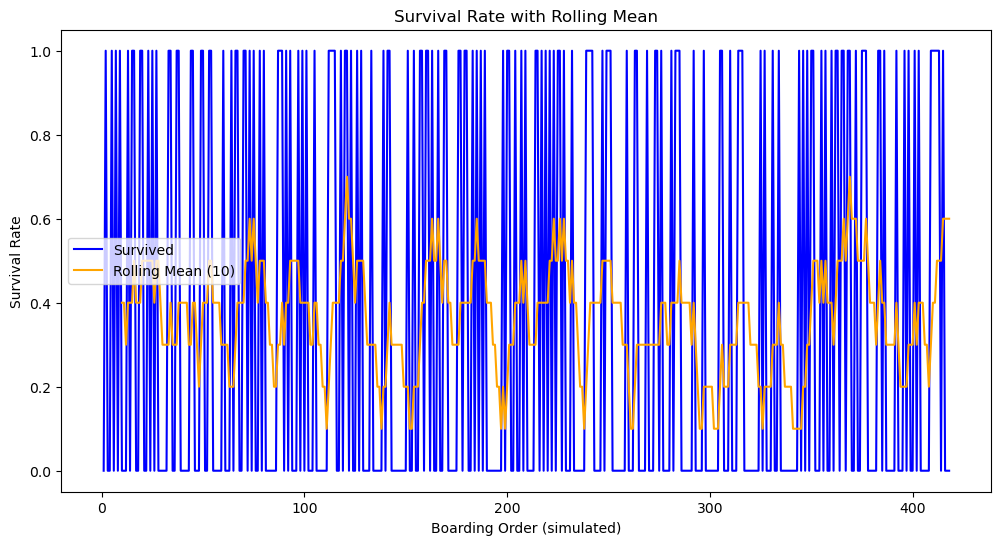

In [31]:

plt.figure(figsize=(12, 6))
plt.plot(data['Survived'], label='Survived', color='blue')
plt.plot(rolling_survival_rate, label='Rolling Mean (10)', color='orange')
plt.title('Survival Rate with Rolling Mean')
plt.xlabel('Boarding Order (simulated)')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()
